In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10_000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [4]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [4]:
import numpy as np

In [5]:
def vectorize_sequences(sequences, dimension=10_000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Building your net

In [9]:
from keras import models
from keras import layers

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10_000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Configuring the optimizer
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
______________loss='binary_crossentropy',
______________metrics=['accuracy'])

## Using custom losses and metrics

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
______________loss=losses.binary_crossentropy,
______________metrics=[metrics.binary_accuracy])

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 134ms/step - loss: 0.5153 - accuracy: 0.7836 - val_loss: 0.3955 - val_accuracy: 0.8522
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3044 - accuracy: 0.8983 - val_loss: 0.3167 - val_accuracy: 0.8772
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2176 - accuracy: 0.9279 - val_loss: 0.2785 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1742 - accuracy: 0.9401 - val_loss: 0.3282 - val_accuracy: 0.8687
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1370 - accuracy: 0.9575 - val_loss: 0.2842 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1172 - accuracy: 0.9628 - val_loss: 0.2953 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0936 - accuracy: 0.9722 - val_loss: 0.3144 - val_accuracy: 0.8829
Epoch 8/20
3

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

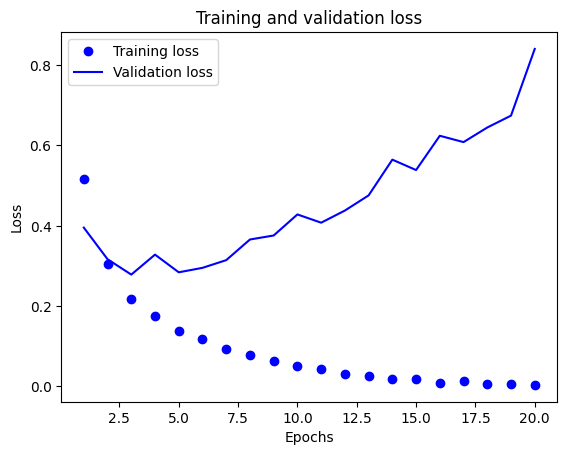

In [21]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

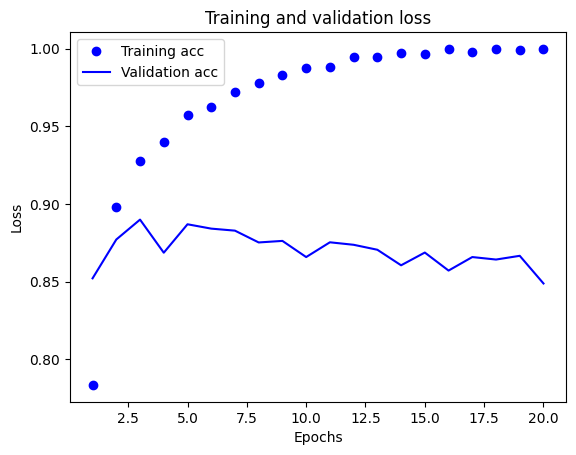

In [22]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.9463 - accuracy: 0.8338


In [24]:
results

[0.9462936520576477, 0.8338000178337097]

In [25]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[1.5052533e-03],
       [9.9999940e-01],
       [3.2038969e-01],
       ...,
       [9.7750779e-04],
       [1.4991830e-03],
       [3.3273116e-01]], dtype=float32)

# Further experiments:
* more / less hidden layers
* more / less hidden units
* MSE loss instead of Binary Crossentropy
* tanh activation function instead relu

## less hidden layers

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10_000,)))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

Epoch 1/20
30/30 [==============================] - 5s 77ms/step - loss: 0.4945 - accuracy: 0.8055 - val_loss: 0.3920 - val_accuracy: 0.8686
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3200 - accuracy: 0.9037 - val_loss: 0.3248 - val_accuracy: 0.8835
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2475 - accuracy: 0.9250 - val_loss: 0.2938 - val_accuracy: 0.8877
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2049 - accuracy: 0.9366 - val_loss: 0.3002 - val_accuracy: 0.8776
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1744 - accuracy: 0.9475 - val_loss: 0.2807 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1518 - accuracy: 0.9556 - val_loss: 0.2807 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1329 - accuracy: 0.9617 - val_loss: 0.2825 - val_accuracy: 0.8850
Epoch 8/20
30

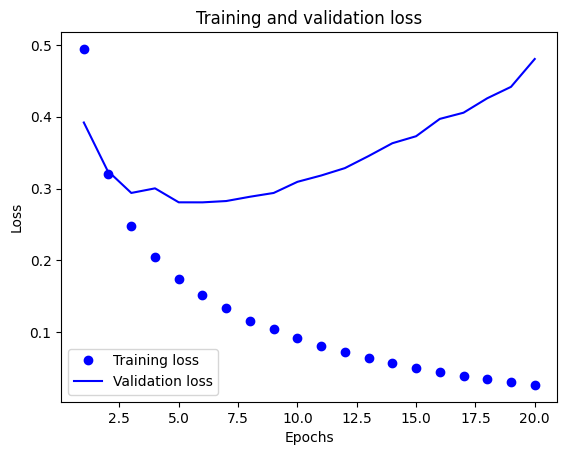

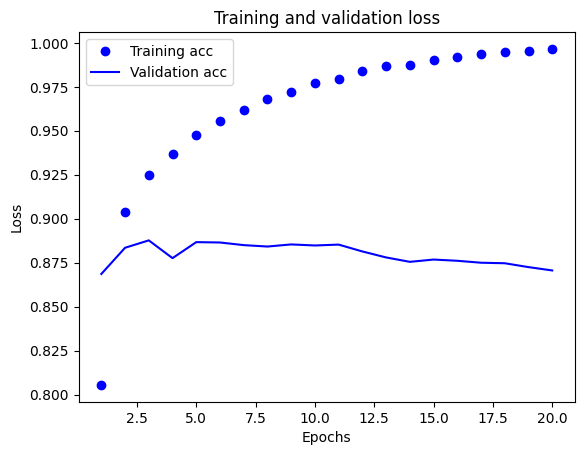

In [15]:
from matplotlib import pyplot as plt

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 2s 3ms/step - loss: 0.5094 - accuracy: 0.8552


[0.509361982345581, 0.8551999926567078]

## more hidden layers

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10_000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

Epoch 1/20
30/30 [==============================] - 3s 95ms/step - loss: 0.5374 - accuracy: 0.7737 - val_loss: 0.3969 - val_accuracy: 0.8632
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3080 - accuracy: 0.8956 - val_loss: 0.3013 - val_accuracy: 0.8851
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2120 - accuracy: 0.9302 - val_loss: 0.3030 - val_accuracy: 0.8794
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1686 - accuracy: 0.9425 - val_loss: 0.2985 - val_accuracy: 0.8816
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1296 - accuracy: 0.9579 - val_loss: 0.2991 - val_accuracy: 0.8849
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1037 - accuracy: 0.9669 - val_loss: 0.3342 - val_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0827 - accuracy: 0.9740 - val_loss: 0.3456 - val_accuracy: 0.8806
Epoch 8/20
30

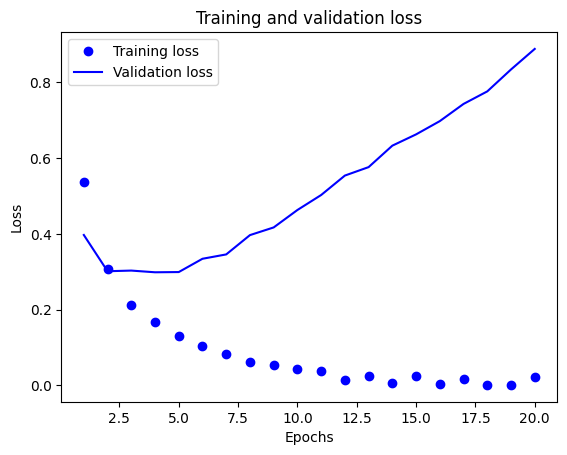

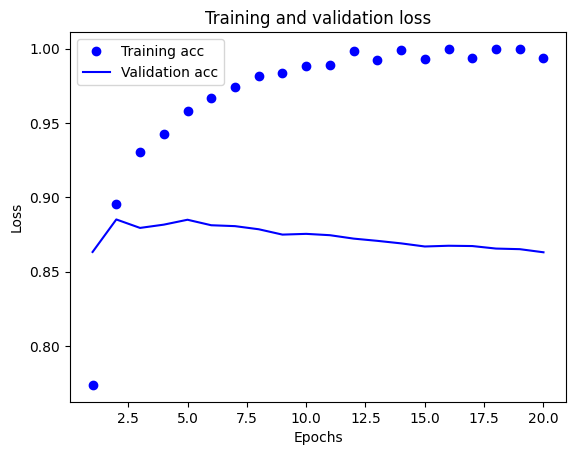

In [18]:
from matplotlib import pyplot as plt

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 2s 3ms/step - loss: 0.9662 - accuracy: 0.8500


[0.9662246108055115, 0.8500400185585022]

## More hidden units

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10_000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

Epoch 1/20
30/30 [==============================] - 2s 72ms/step - loss: 0.4656 - accuracy: 0.7966 - val_loss: 0.3173 - val_accuracy: 0.8812
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2659 - accuracy: 0.9011 - val_loss: 0.3040 - val_accuracy: 0.8778
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1859 - accuracy: 0.9349 - val_loss: 0.3044 - val_accuracy: 0.8792
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1448 - accuracy: 0.9486 - val_loss: 0.3145 - val_accuracy: 0.8783
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1082 - accuracy: 0.9624 - val_loss: 0.3123 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0801 - accuracy: 0.9745 - val_loss: 0.3548 - val_accuracy: 0.8807
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0627 - accuracy: 0.9801 - val_loss: 0.3920 - val_accuracy: 0.8761
Epoch 8/20
30

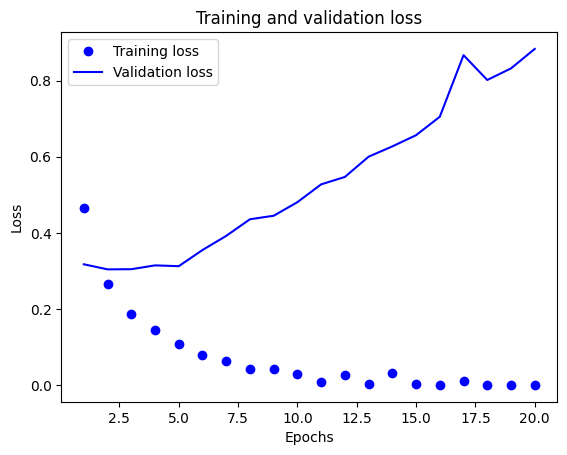

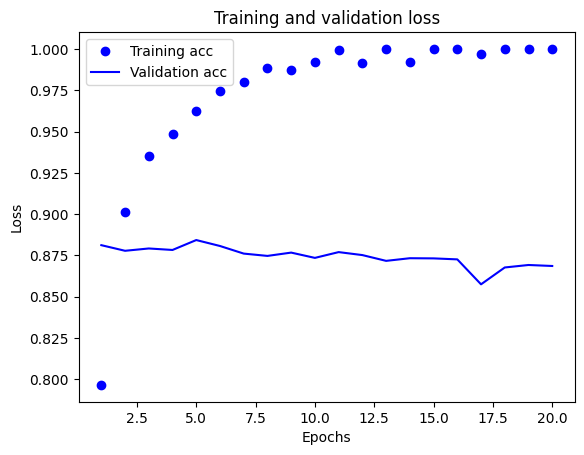

In [21]:
from matplotlib import pyplot as plt

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 3s 3ms/step - loss: 0.9803 - accuracy: 0.8532


[0.9802870154380798, 0.8532400131225586]

## Less hidden units

In [11]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10_000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

Epoch 1/20
30/30 [==============================] - 4s 63ms/step - loss: 0.5243 - accuracy: 0.7877 - val_loss: 0.4191 - val_accuracy: 0.8594
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3370 - accuracy: 0.8998 - val_loss: 0.3365 - val_accuracy: 0.8803
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2572 - accuracy: 0.9225 - val_loss: 0.2985 - val_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2069 - accuracy: 0.9363 - val_loss: 0.2820 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1767 - accuracy: 0.9473 - val_loss: 0.2755 - val_accuracy: 0.8918
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1500 - accuracy: 0.9568 - val_loss: 0.2832 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1293 - accuracy: 0.9636 - val_loss: 0.2835 - val_accuracy: 0.8873
Epoch 8/20
30

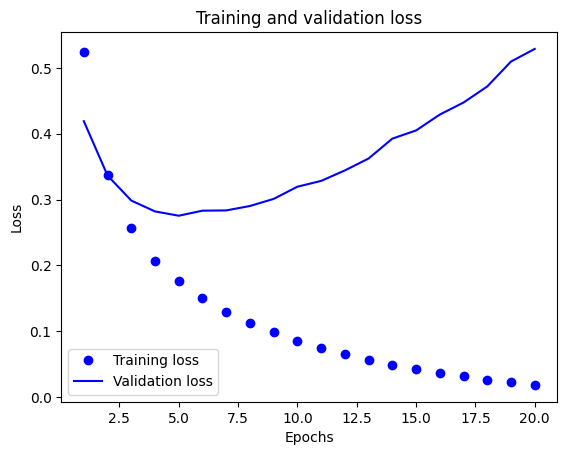

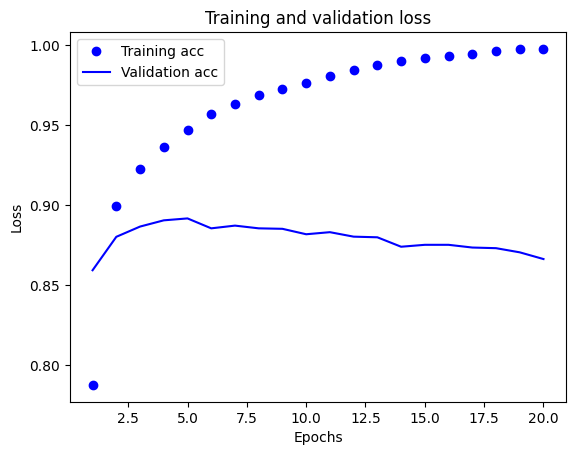

In [12]:
from matplotlib import pyplot as plt

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 3s 3ms/step - loss: 0.5817 - accuracy: 0.8532


[0.581730842590332, 0.8532400131225586]

## 'tanh' instead of 'relu'

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10_000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.4871 - accuracy: 0.8019 - val_loss: 0.3567 - val_accuracy: 0.8749
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2746 - accuracy: 0.9109 - val_loss: 0.3148 - val_accuracy: 0.8707
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1957 - accuracy: 0.9328 - val_loss: 0.2854 - val_accuracy: 0.8832
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1436 - accuracy: 0.9519 - val_loss: 0.3161 - val_accuracy: 0.8722
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1149 - accuracy: 0.9611 - val_loss: 0.3024 - val_accuracy: 0.8852
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0854 - accuracy: 0.9727 - val_loss: 0.3383 - val_accuracy: 0.8808
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0668 - accuracy: 0.9801 - val_loss: 0.4381 - val_accuracy: 0.8674
Epoch 8/20
30

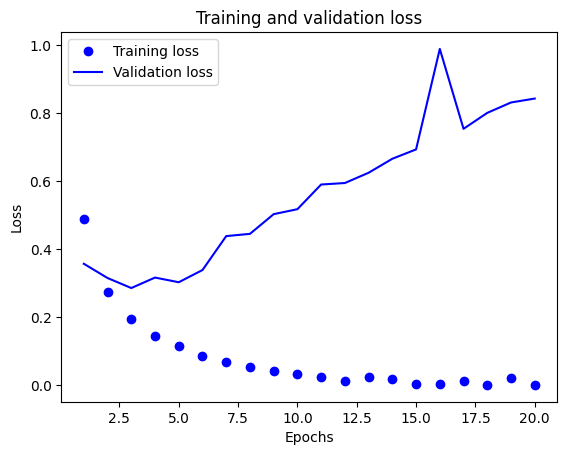

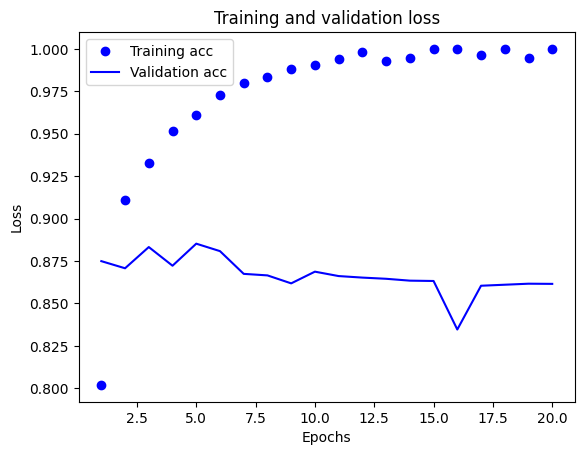

In [15]:
from matplotlib import pyplot as plt

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 3s 3ms/step - loss: 0.9425 - accuracy: 0.8448


[0.9424526691436768, 0.8448399901390076]